# Problem 4


In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [17]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1',  0.0, 0.0)
mdl.node('2',  8.0, 0.0)
mdl.node('3', 16.0, 0.0)
mdl.node('4',  8.0, 6.0)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['2'], n['4'])
mdl.truss('d', n['3'], n['4'])

# Define plastic capacity
e['a'].Qp['+']['1'] = e['a'].Qp['-']['1'] = 500
e['a'].Qp['+']['2'] = e['a'].Qp['-']['2'] = 150.001
e['a'].Qp['+']['3'] = e['a'].Qp['-']['3'] = 150.001
 
e['c'].Qp['+']['1'] = e['c'].Qp['-']['1'] = 500
e['c'].Qp['+']['2'] = e['c'].Qp['-']['2'] = 120
e['c'].Qp['+']['3'] = e['c'].Qp['-']['3'] = 120
 
e['b'].Qp['+']['1'] = e['b'].Qp['-']['1'] = 500
e['b'].Qp['+']['2'] = e['b'].Qp['-']['2'] = 150
e['b'].Qp['+']['3'] = e['b'].Qp['-']['3'] = 150

e['d'].Qp['+']['1'] = e['d'].Qp['-']['1'] =  20

mdl.roller(n['1'])
mdl.fix(n['3'], ['x', 'y', 'rz'])

mdl.numDOF()

[[1, 9, 2], [3, 4, 5], [10, 11, 12], [6, 7, 8]]

In [18]:
n['4'].p['x'] = 10
n['2'].p['y'] = -30

In [19]:
Uf = em.analysis.SolveDispl(mdl)

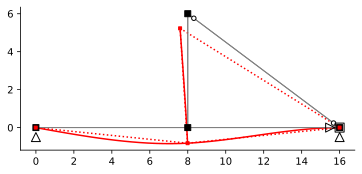

In [20]:
fig, ax = plt.subplots(1,1)
em.plot_U(mdl, Uf, ax, scale=1e-3)

In [21]:
Uf

,$U_{{ffffffffffff}}$
$1$,-9.251701
$2$,-180.000000
$3$,-9.251701
$4$,-821.496599
$5$,51.938776
$6$,-404.149660
$7$,-771.292517
$8$,72.755102


In [22]:
lambdac, Q = em.analysis.PlasticAnalysis_wLBT(mdl)
Q

,$Q_{{}}$
$a_1$,-0.0
$a_2$,0.0
$a_3$,117.6
$b_1$,-5.4
$b_2$,-150.0
$b_3$,-150.0
$c_1$,12.0
$c_2$,32.4
$c_3$,0.0
$d_1$,-20.0


In [23]:
lambdac

2.1399999999999992